### **Visualizing Persian Text Insights: A Word Cloud Analysis with Hazm**


Hazm is a powerful natural language processing (NLP) library designed specifically for the Persian language in Python. This open-source library provides a comprehensive set of tools and functionalities for various NLP tasks, including text tokenization, stemming, lemmatization, and more. With a focus on the unique linguistic characteristics of the Persian language, Hazm facilitates the analysis and processing of Persian text data. It has become an essential resource for developers and researchers working on projects involving Persian language processing, enabling them to perform sophisticated linguistic analyses and gain insights into the structure and semantics of Persian text. Hazm plays a crucial role in bridging the gap between the general-purpose NLP tools available in Python and the specific requirements of Persian language processing, making it an invaluable asset for anyone working with Persian text data in the realm of natural language processing.



In [1]:
!pip install hazm -q

In [2]:
import pandas as pd
import string
import matplotlib.pyplot as ptl
import wordcloud
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
 # If your data is pdf file
def read_pdf(file_path):
    # Open the PDF file in binary mode
    with open(file_path, 'rb') as file:
        # Create a PDF reader object
        pdf_reader = PyPDF2.PdfReader(file)

        # Get the number of pages in the PDF
        num_pages = len(pdf_reader.pages)

        # Extracted text from all pages
        extracted_text = ""

        # Iterate through all pages and append text
        for page_num in range(num_pages):
            # Get the page object
            page = pdf_reader.pages[page_num]

            # Extract text from the page
            text = page.extract_text()

            # Append the text from each page
            extracted_text += text

        return extracted_text

# Replace 'your_file.pdf' with the path to your PDF file
corpus = read_pdf('/content/sample_data/persian.pdf')


In [ ]:
# If your data is  Excel file
excel_file_path = "/content/sample_data/persian.xlsx"

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)

messages = df['Message']

# Display the "Message" column
print(messages)

# Combine all messages into a single string
corpus = ' '.join(messages)

In [ ]:
from hazm import stopwords_list, word_tokenize
import re

# Tokenize the text using hazm.word_tokenize
words = word_tokenize(corpus.lower())

# Remove punctuation and keep only alphabetical words
filtered_words = [word for word in words if word.isalpha()]

# Get the list of Persian stopwords from hazm
stop_words = set(stopwords_list())

# Define a regex pattern for Persian characters
persian_pattern = re.compile(r'^[\u0600-\u06FF]+$')

# Filter out stopwords and non-Persian words
filtered_sentence = [w for w in filtered_words if w not in stop_words and persian_pattern.match(w)]

# Eliminate words with hashtags attached in between Persian words
final_filtered_words = []
i = 0
while i < len(filtered_sentence):
    # Check if the word has a '#' in it
    if '#' in filtered_sentence[i]:
        # Split the word by '#' and keep only the last part
        parts = filtered_sentence[i].split('#')
        final_filtered_words.append(parts[-1])
    else:
        final_filtered_words.append(filtered_sentence[i])
    i += 1

# Print the final filtered words
print(final_filtered_words)


In [ ]:
from hazm import word_tokenize

# Join the list of words into a string
corpus = ' '.join(final_filtered_words)

# Tokenize the Persian text
words = word_tokenize(corpus)

# Create a dictionary for frequency distribution
frequency_dist = {}

# Count the occurrences of each word
for word in words:
    frequency_dist[word] = frequency_dist.get(word, 0) + 1

# Filter out short words (length > 3)
large_words = {k: v for k, v in frequency_dist.items() if len(k) > 3}

# Print the frequency distribution for larger Persian words
print(large_words)

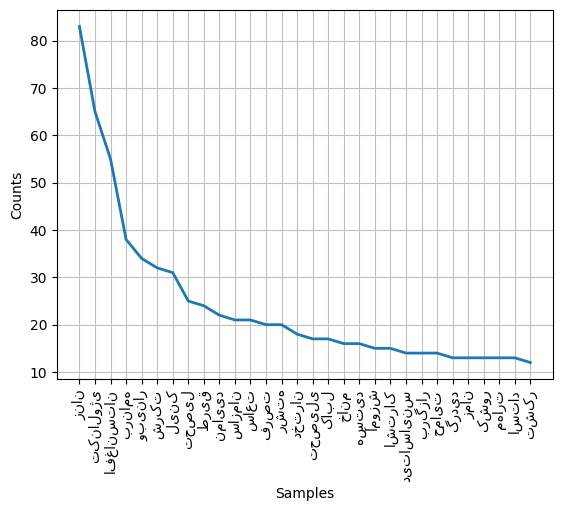

<Axes: xlabel='Samples', ylabel='Counts'>

In [7]:
frequency_dist = nltk.FreqDist(large_words)
frequency_dist
frequency_dist.plot(30,cumulative=False)

In [8]:
!pip install persian_wordcloud -q

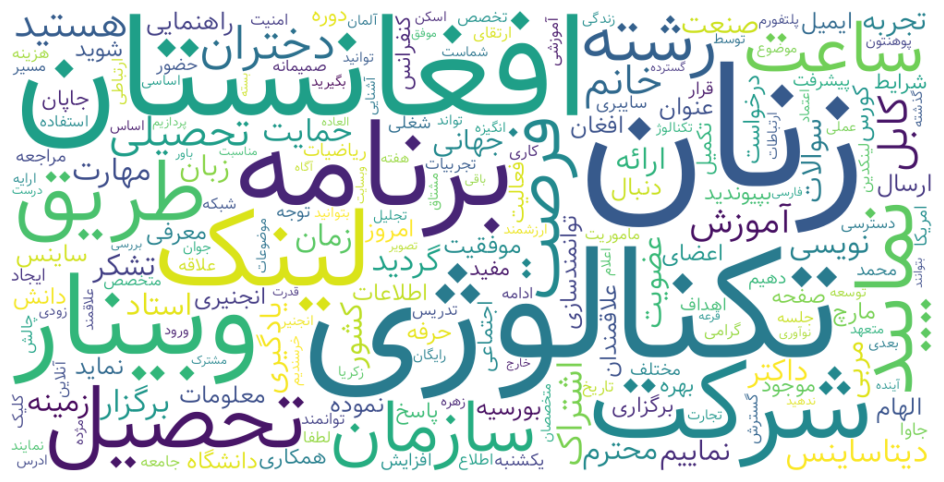

In [9]:
from persian_wordcloud.wordcloud import PersianWordCloud
import matplotlib.pyplot as plt

# Create a PersianWordCloud object
wordcloud = PersianWordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(large_words)

# Plot the Persian WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()